<a href="https://colab.research.google.com/github/skj092/Automatic-License-Plate-Recognition-ALPR-/blob/main/ALPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Licence Plate Recognitioon



## Cloning the yolov5 repository

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13687, done.
remote: Counting objects: 100% (489/489), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 13687 (delta 354), reused 438 (delta 312), pack-reused 13198
Receiving objects: 100% (13687/13687), 13.22 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (9415/9415), done.


## Settin up Directory structure for the YOLO

## Downloading dataset using kaggle api

In [2]:
from google.colab import files
file = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ../../root/.kaggle/

In [4]:
!cp kaggle.json ../../root/.kaggle

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d sonujha090/automatic-license-plate-recognition-alpr

 98% 537M/547M [00:16<00:00, 39.8MB/s]
100% 547M/547M [00:16<00:00, 35.5MB/s]


In [7]:
import os 

if not os.path.exists("Dataset"):
  os.mkdir("Dataset")

In [ ]:
!unzip automatic-license-plate-recognition-alpr.zip -d "Dataset"

# Dividing the data into training and testing sets

## Preparing training setup

In [9]:
cd yolov5

/content/yolov5


In [10]:
!touch config.yaml

In [11]:
# train: /content/Dataset/obj/train
# val: /content/Dataset/obj/validation
# nc: 1
# names: ["licence plate"]

In [12]:
!python train.py --img 400 --batch 16  --epochs 50 --data config.yaml 

train: weights=yolov5s.pt, cfg=, data=config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 

## After restart runtime

In [ ]:
# cd yolov5

/content/Global-Wheat-Detection-YOLO/yolov5


In [ ]:
# !python train.py --img 1024 --batch 16  --epochs 20 --data helmet.yaml 

# Save the files

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
ls /content/drive/MyDrive/ALPR/

In [23]:
!cp -r /content/yolov5 /content/drive/MyDrive/ALPR/

# Prediction

In [29]:
!cp /content/yolov5/runs/train/exp/weights/best.pt .

In [30]:
ls /content/

automatic-license-plate-recognition-alpr.zip  drive/        yolov5/
Dataset/                                      kaggle.json
download.jpeg                                 sample_data/


In [31]:
!python detect.py --source /content/download.jpeg --weights best.pt

detect: weights=['best.pt'], source=/content/download.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/download.jpeg: 480x640 1 licence plate, 11.5ms
Speed: 0.5ms pre-process, 11.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


## Results

In [33]:
from IPython.display import Image

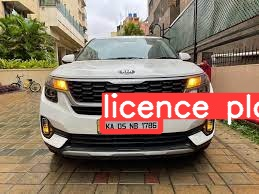

In [34]:
Image(filename='/content/yolov5/runs/detect/exp2/download.jpeg') 

In [35]:
# !python detect.py --source "https://www.youtube.com/watch?v=6PoPwZ0WO9w" --weights best.pt